# Read data

In [87]:
import glob
import matplotlib.pyplot as plt
import matplotlib.patches

# Visualizations will be shown in the notebook.
%matplotlib inline

dir = "results"
numFires = 2
numUAVs = 40
comRange = 10

files = glob.glob(dir + "/fires_" + str(numFires) + "_uavs_" + str(numUAVs) + "_range_" + str(comRange) + "/*.txt")

data = []
    
for file in files:
    with open(file) as f:
        content = f.readlines()
        entry = []
        for i in range(1,5):
            entry.append([int(s) for s in content[i].split() if s.isdigit()][0])
        data.append(entry)
        
average = [sum(y) / len(y) for y in zip(*data)]

# Plot graph

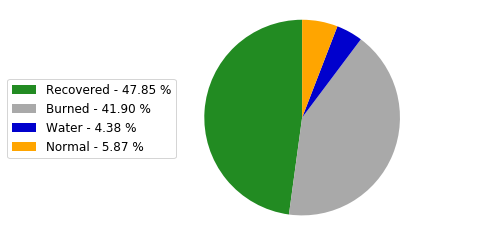

In [88]:
labels = 'Recovered', 'Burned', 'Water', 'Normal'
colors = ['forestgreen', 'darkgray', 'mediumblue', 'orange']

porcent = [x * 100/sum(average) for x in average]

patches, texts = plt.pie(average, colors=colors, startangle=90, radius=1.2)
plt.axis('equal')
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.4, 0.5), fontsize=12)

plt.savefig('report/images/fires_' + str(numFires) + '_uavs_' + str(numUAVs) + "_range_" + str(comRange) + '.png', bbox_inches='tight')